# Activation function evaluation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


In [34]:
y_train[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))   #First hidden layer of 512 neurons, each neuron takes input 
                                                               # vector of size 784




model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


# Total number of parameters =  (no of 1st layer hidden neurons * no of input neurons) + (no of 1st layer hidden neurons) ---> for the number of bias parameters
#                             + (no of output layer  neurons  * no of 1st hidden layer neurons) + (no of output layer neurons)

#                        =   ((512 * 784) + 512) + ((10 * 512) + 10) = 407050

dense_250 (None, 784) ==> (None, 784)
dense_251 (None, 784) ==> (None, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_250 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_251 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.2513 - acc: 0.9303 - val_loss: 0.2947 - val_acc: 0.9224
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.2507 - acc: 0.9304 - val_loss: 0.3025 - val_acc: 0.9212
Epoch 3/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.2487 - acc: 0.9314 - val_loss: 0.2883 - val_acc: 0.9242
Epoch 4/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2489 - acc: 0.9316 - val_loss: 0.2856 - val_acc: 0.9234
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.2492 - acc: 0.9319 - val_loss: 0.2891 - val_acc: 0.9245
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2489 - acc: 0.9314 - val_loss: 0.2987 - val_acc: 0.9203
Epoch 7/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.2473 - acc: 0.9324 - val_loss: 0.2796 -

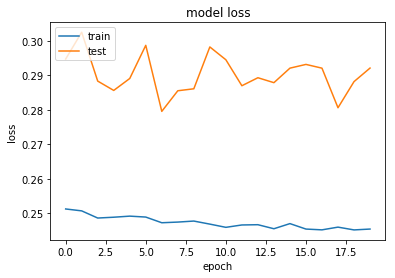

In [99]:
batch_size = 128    # keep in 2^x 
epochs = 20
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Observations about number of epochs and batch size

1. We get a high test accuracy  of 92+ is for number of epochs = 20 . However, the test error increases with epochs and peaks at 0.096 in the given epochs
2. We get high accuracy for epoch = 1
3. A simple neural network with 784 input neurons and single hidden layer with ReLU nonlinearity, one output layer  of 10 neurons with softmax seems to be giving the best result


Q What is your observation when we keep batch size small and increase number of epochs. Compare this to large batch size and lesser epochs. Also compare to large batch size large number of epochs

# Activation function selection

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.3843 - acc: 0.8878 - val_loss: 0.2848 - val_acc: 0.9187
Epoch 2/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3101 - acc: 0.9141 - val_loss: 0.2870 - val_acc: 0.9241
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.2953 - acc: 0.9180 - val_loss: 0.3023 - val_acc: 0.9151
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.2896 - acc: 0.9193 - val_loss: 0.2949 - val_acc: 0.9207
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.2815 - acc: 0.9217 - val_loss: 0.2839 - val_acc: 0.9197
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2787 - acc: 0.9226 - val_loss: 0.2774 - val_acc: 0.9228
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2760 - acc: 0.9231 - val_loss: 0.2910 -

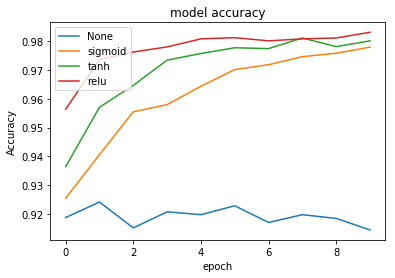

In [100]:
batch_size = 128
epochs = 10

for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    
    plt.plot(history.history['val_acc'])

    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

# Observations about choice of non-linear functions

1. The blue line is for a linear function and surprisingly it is giving 91% + accuracy!
2. However, all the other standard activations ReLU, tanh, Sigmoid are performing relatively much better
3. All converge to same 98% +- accuracy score with increase in epoch (upto 15)
4. Any further increase in epochs may not help as all of them stop increasing beyond 
5. Simoid is the slowest learner followed by tanh while ReLU seems to learn fast....


Query - Increase the epochs from 1 to 5 and observe the behavior of the network with the different activations

1. How does the accuracy for each activation function behave with 1, 2, .... epochs. Anything particular about ReLU

In [8]:
type(history)   # What is this

keras.callbacks.History

# Number of hidden layers

In [92]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(784,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print('Test score:', score)
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_472 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_473 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


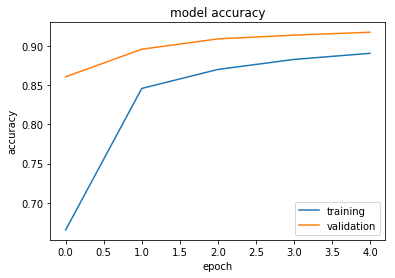


Test loss: 0.363
Test score: [0.1956020665794611, 0.9436]
Test accuracy: 0.901
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_474 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_475 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_476 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


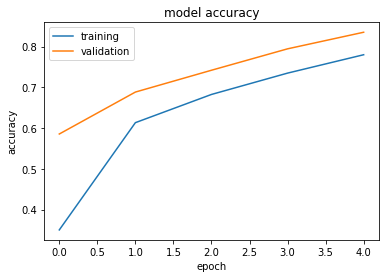


Test loss: 0.955
Test score: [0.1956020665794611, 0.9436]
Test accuracy: 0.809
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_477 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_478 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_479 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_480 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


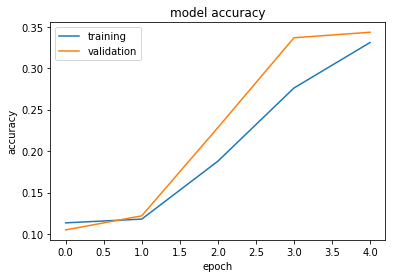


Test loss: 2.13
Test score: [0.1956020665794611, 0.9436]
Test accuracy: 0.345
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_481 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_482 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_483 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_484 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_485 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


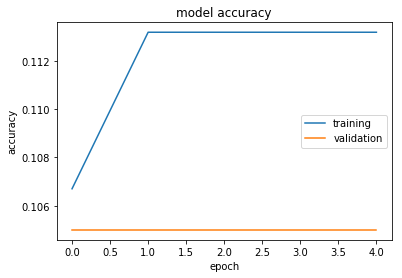


Test loss: 2.3
Test score: [0.1956020665794611, 0.9436]
Test accuracy: 0.114


In [93]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

# Observations about number of layers

1. With one hidden of 32 neurons and one ouput layer of 10 the network does a reasonable job getting accuracy of 90%
2. With two hidden layers of 32 neurons,the accuracy dips! can you guess what could this be due to ?
3. With three hidden layers of 32 neurons the story even worse than previous case. The accuracy bombs 
4. With one more hidden layer it becomes even more worse 

Q Why is this? How can this situation be improved?

# Increasing number of nodes in a layer

In [103]:


def create_dense(layer_sizes):
    image_size = 784
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=10):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_556 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_557 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


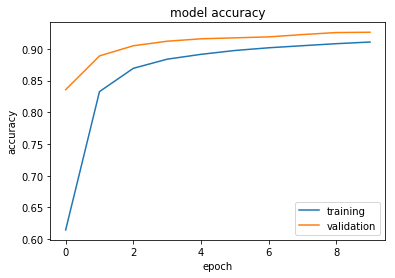


Test loss: 0.3
Test accuracy: 0.916
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_558 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_559 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_560 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


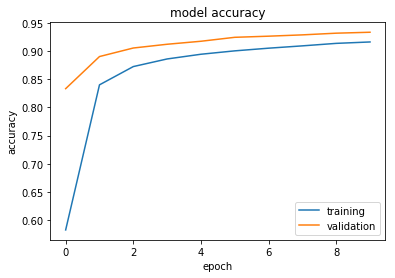


Test loss: 0.271
Test accuracy: 0.921
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_561 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_562 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_563 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_564 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


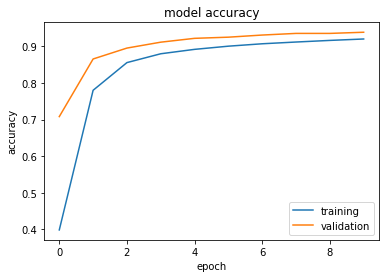


Test loss: 0.256
Test accuracy: 0.925
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_565 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_566 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_567 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_568 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_569 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


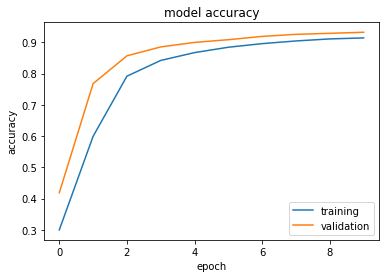


Test loss: 0.277
Test accuracy: 0.921
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_570 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_571 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


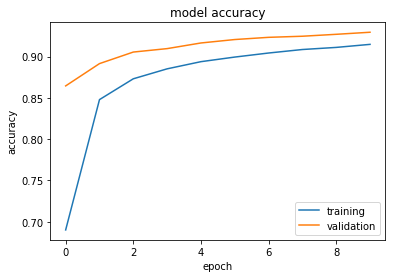


Test loss: 0.28
Test accuracy: 0.92
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_572 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_573 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_574 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


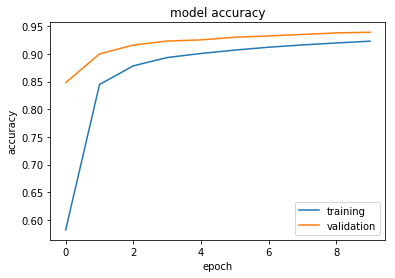


Test loss: 0.25
Test accuracy: 0.93
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_575 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_576 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_577 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_578 (Dense)            (None, 10)                650       
Total params: 59,210
Trainable params: 59,210
Non-trainable params: 0
_________________________________________________________________


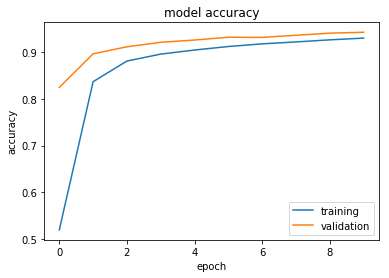


Test loss: 0.227
Test accuracy: 0.934
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_579 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_580 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_581 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_582 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_583 (Dense)            (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________


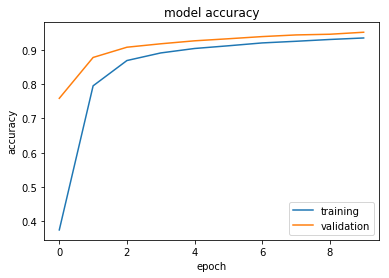


Test loss: 0.212
Test accuracy: 0.938
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_584 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_585 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


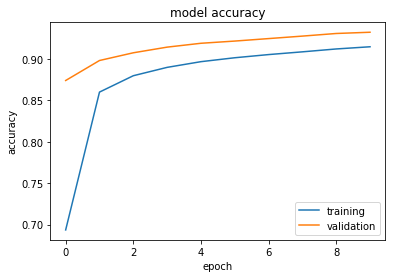


Test loss: 0.282
Test accuracy: 0.921
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_586 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_587 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_588 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


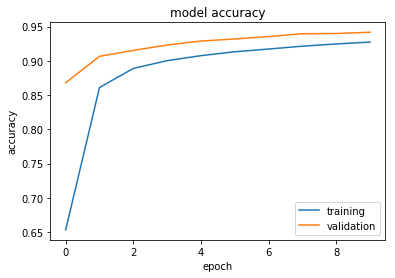


Test loss: 0.239
Test accuracy: 0.932
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_589 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_590 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_591 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_592 (Dense)            (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


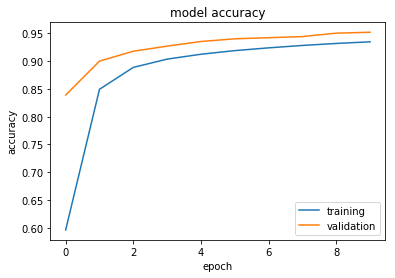


Test loss: 0.209
Test accuracy: 0.941
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_593 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_594 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_595 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_596 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_597 (Dense)            (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


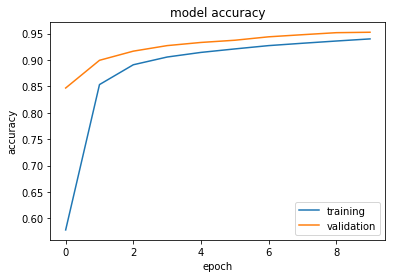


Test loss: 0.194
Test accuracy: 0.944
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_598 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_599 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


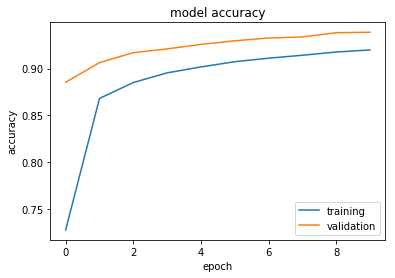


Test loss: 0.265
Test accuracy: 0.927
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_600 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_601 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_602 (Dense)            (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


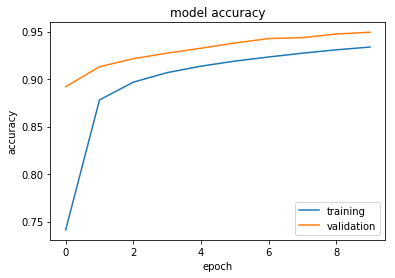


Test loss: 0.219
Test accuracy: 0.936
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_603 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_604 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_605 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_606 (Dense)            (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


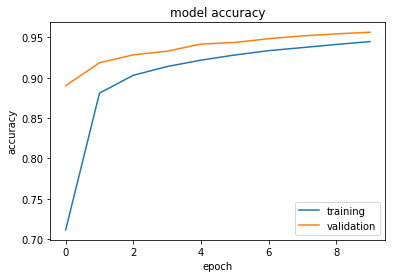


Test loss: 0.182
Test accuracy: 0.946
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_607 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_608 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_609 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_610 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_611 (Dense)            (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


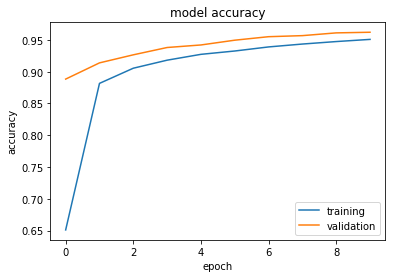


Test loss: 0.164
Test accuracy: 0.951


In [104]:
for nodes in [32, 64, 128, 512]:
    for layers in range(1, 5):  
        model = create_dense([nodes] * layers)
        evaluate(model)


# Observations about number of layers and number of neurons per layer

1. Surprisingly the performance on validation set is consistently higher than on the training set. This could be due to 
   the size of test set being much smaller than training, it ends up containing all the patterns found in training. However,
   training set itself being large has many patterns probably not yet captured even by the largest NN in the test above
   
2. Both the test and training accuracies grow almost in tandem.Infact the gap becomes smaller with increase in accuracay. This
   is reassuring that even the largest configuration above is not an overfit situation
   
3. Given point 1 and 2, there is scope for further increase in epochs, number of neurons in the layers. Hopefully one of those
   not tested configurations will give even higher accuracy scores without overfitting
   
Q Why is validation set performance consistently higher than that of training set?   
Q Is it better to have less layers with more neurons per layer or more layers with less number of neurons. Which one gives better returns... Note: Accuracy is important but at what computational cost? 

# About the Keras Code

The create_dense function creates the actual structure of the model in terms of sequentially appending the layers, number of nodes in each layer. It also connects the input layer to the first hidden layer

The evaluate function configurse the defined model structure to use appropriate activation and loss functions. It trains and executes the model through the model.evaluate() function call

It also prints a summary of its performance on the test data. By default it does all this using the fixed hyperparameters specifically:

stochastic gradient descent (SGD)
five training epochs
training batch size of 128
the categorical cross entropy loss function.


The input to the model is a vector of length 784 , and output vector of length ten that uses a one-hot encoding and the softmax activation function 


# Learning Rate Optimization 

In [63]:
from keras.optimizers import SGD

def create_model():
    model = Sequential()
    model.add(Dense(784, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [79]:

def run_model(model, lr):
    batch_size = 128    # keep in 2^x 
    epochs = 10
    model.summary()
    opt = SGD(lr=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print("learning rate" , lr)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_395 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
learning rate 0.01


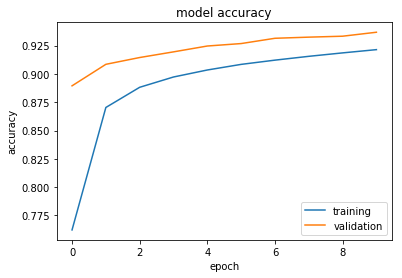


Test loss: 0.264
Test accuracy: 0.926
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_395 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
learning rate 0.02


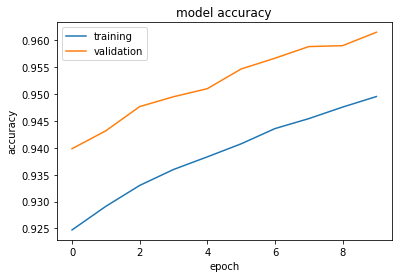


Test loss: 0.179
Test accuracy: 0.949
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_395 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
learning rate 0.03


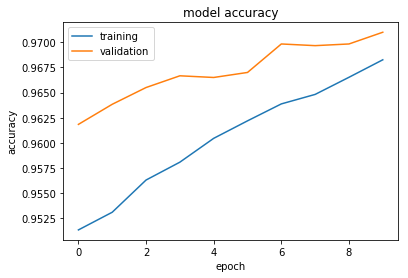


Test loss: 0.124
Test accuracy: 0.965
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_395 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
learning rate 0.04


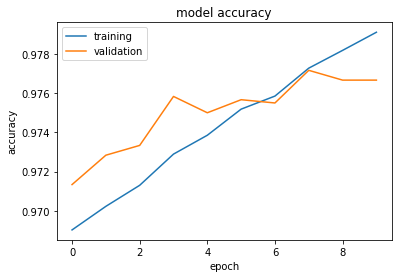


Test loss: 0.0938
Test accuracy: 0.972
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_394 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_395 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
learning rate 0.05


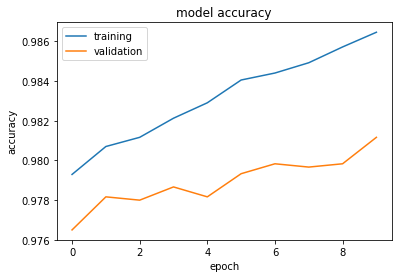


Test loss: 0.0773
Test accuracy: 0.976


In [81]:
import numpy as np
model = create_model()
for lr in np.arange(0.01, 0.06 , 0.01):    # try lr of 0.01 to 0.06 in steps of 0.01
    run_model(model , lr)


# Observations about choice of learning rate

1. Validation performance is higher than the training performance except in once case or lr = 0.04
2. Test accuracy of 97.6 is obtained for learning rate of 0.05. However Training accuracy is beyond 98.6 


Query - Increase the epochs from 1 to 5 and observe the behavior of the network with the different activations

1. How does the accuracy for each activation function behave with 1, 2, .... epochs. Anything particular about ReLU

# Gradient Descent Optimizers

In [6]:
def create_model():
    model = Sequential()
    model.add(Dense(784, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [22]:
from keras import optimizers

def run_model(model):
    batch_size = 128    # keep in 2^x 
    epochs = 10
    model.summary()
#   sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#   sgd = optimizers.Adam(lr=0.01, decay=1e-6)
    sgd = optimizers.rmsprop(lr=0.01, decay=1e-6)


  
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


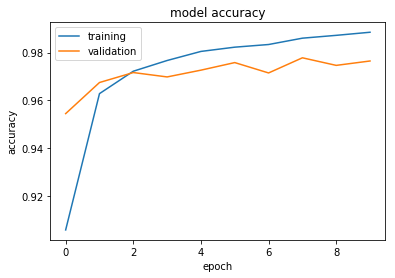


Test loss: 0.243
Test accuracy: 0.977


In [23]:
model = create_model()
run_model(model)

# Dropout based regularization



In [30]:


def create_model():
    model = Sequential()
    model.add(Dense(784, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.3))  # 20% drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [31]:
from keras import optimizers

def run_model(model):
    batch_size = 128    # keep in 2^x 
    epochs = 10
    model.summary()
#   sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#   sgd = optimizers.Adam(lr=0.01, decay=1e-6)
    sgd = optimizers.rmsprop(lr=0.01, decay=1e-6)


  
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


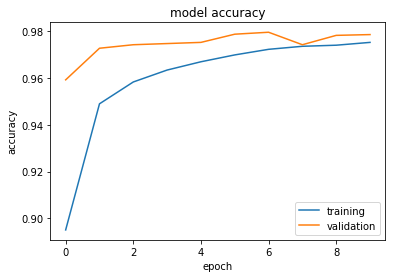


Test loss: 0.231
Test accuracy: 0.977


In [32]:
model = create_model()
run_model(model)

# Observations about Dropout 

1. The training and validation scores are almost same unlike before the drop out where they were deviating a lot
2. Dropout works like ensemble, reducing both bias and variance errors
3. With only one dense layer and one dropout layer with p of .2 the score was 97.7 for both training and validation
4. Modified the dropout rate from .2 to .5. The validation score dropped by a small amount to 97.3 while training score was less
5. Changed the dropout probability to .3 The validation score was restored to 97.7 while training score was slightly less


Q. Should we have more dense layers and higher percent of drop out or  lesser number of layers and lower drop out

# Grid Search

In [47]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


In [54]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(784, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   
    return model

In [55]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=2, batch_size=512, verbose=0) # Wrapper for scikitlearn API, provides 
                                                                                    # facility to get scores 


In [64]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [65]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989400 using {'optimizer': 'Adagrad'}
0.900001 (0.000000) with: {'optimizer': 'SGD'}
0.988522 (0.000264) with: {'optimizer': 'RMSprop'}
0.989400 (0.000850) with: {'optimizer': 'Adagrad'}


In [66]:
optimizer = ['SGD', 'RMSprop']
batch_size = [256,512]
epochs = [1 , 5]

param_grid = dict(optimizer=optimizer,batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\Mukesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.994195 using {'batch_size': 256, 'epochs': 5, 'optimizer': 'RMSprop'}
0.900000 (0.000000) with: {'batch_size': 256, 'epochs': 1, 'optimizer': 'SGD'}
0.987447 (0.001294) with: {'batch_size': 256, 'epochs': 1, 'optimizer': 'RMSprop'}
0.906800 (0.001206) with: {'batch_size': 256, 'epochs': 5, 'optimizer': 'SGD'}
0.994195 (0.000918) with: {'batch_size': 256, 'epochs': 5, 'optimizer': 'RMSprop'}
0.900001 (0.000000) with: {'batch_size': 512, 'epochs': 1, 'optimizer': 'SGD'}
0.979243 (0.002304) with: {'batch_size': 512, 'epochs': 1, 'optimizer': 'RMSprop'}
0.900197 (0.000143) with: {'batch_size': 512, 'epochs': 5, 'optimizer': 'SGD'}
0.991305 (0.002258) with: {'batch_size': 512, 'epochs': 5, 'optimizer': 'RMSprop'}


In [ ]:
#learn_rate = [0.001, 0.002]
#momentum = [0.0, 0.1, 0.3]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# activation = ['relu', 'tanh', 'sigmoid']
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons = [10, 12, 13, 14, 15]

# Random GridSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_iter_search = 20
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=1, n_iter=n_iter_search, cv=5)

TypeError: __init__() got an unexpected keyword argument 'param_grid'

In [71]:
#keras_param_options = {learn_rate = [0.001, 0.002]}

param_grid = dict(learn_rate = [0.001, 0.002])

rs_keras = RandomizedSearchCV( 
    model, 
    param_distributions = param_grid,
    fit_params = keras_fit_params,
    scoring = 'neg_log_loss',
    n_iter = 3, 
    cv = 3,
    n_jobs = -1,
    verbose = 1
)

NameError: name 'keras_fit_params' is not defined